#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics  import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split as tts

#### Importing The Data

In [2]:
file='Data.csv'
data=pd.read_csv(file)
print(data.dtypes,'\n\nShape ->',data.shape)
data.head()

AT    float64
V     float64
AP    float64
RH    float64
PE    float64
dtype: object 

Shape -> (9568, 5)


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


### Preprocessing

In [3]:
data.isna().sum()
#NO missings observed

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [4]:
# Splitting the data
inputs=data.drop('PE',axis=1)
target=data['PE']
x_train,x_test,y_train,y_test=tts(inputs,target,test_size=0.2,random_state=42)

In [67]:
# Scaling Down the data , to ensure all models work properly
from sklearn.preprocessing import StandardScaler
y_train=np.array(y_train).reshape(len(y_train),1)
y_test=np.array(y_test).reshape(len(y_test),1)
standardscaler_x=StandardScaler().fit(x_train)
standardscaler_y=StandardScaler().fit(y_train)
x_train=standardscaler_x.transform(x_train)
x_test=standardscaler_x.transform(x_test)
y_train=standardscaler_y.transform(y_train)
y_test=standardscaler_y.transform(y_test)

<Figure size 640x480 with 0 Axes>

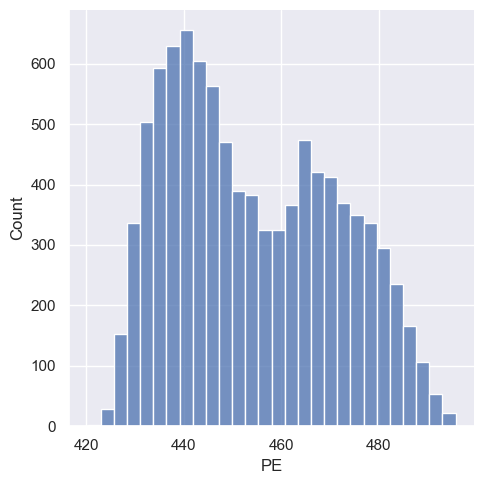

In [59]:
# Checking for outliers
plt.figure()
sns.displot(data['PE'])
plt.show()

In [60]:
# Checking for correlations
data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


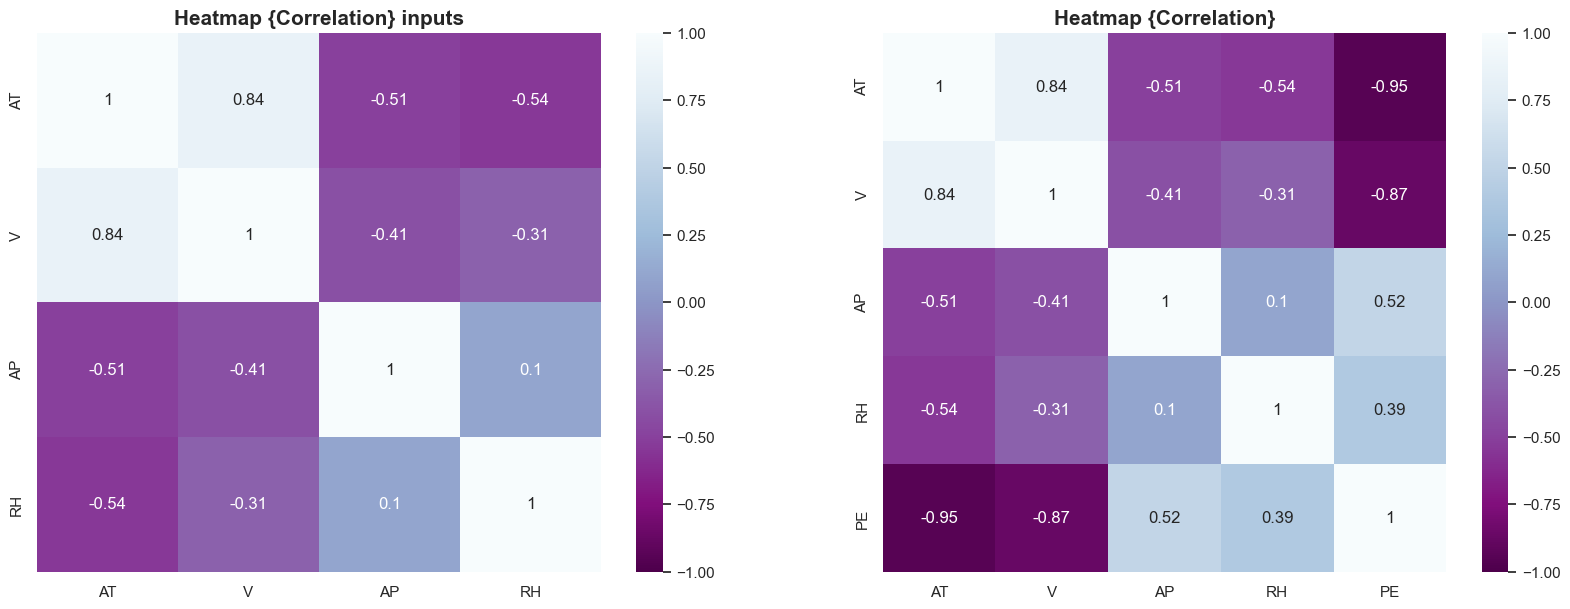

In [8]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.heatmap(data.corr().drop('PE',axis=1).drop('PE'),vmin=-1,vmax=1,cmap='BuPu_r',annot=True,ax=ax[0])
sns.heatmap(data.corr(),vmin=-1,vmax=1,cmap='BuPu_r',annot=True,ax=ax[1])
ax[1].set_title('Heatmap {Correlation}',fontweight='bold',fontsize=15)
ax[0].set_title('Heatmap {Correlation} inputs',fontweight='bold',fontsize=15)
plt.show()

## Fitting Models

##### Linear Regression

In [61]:
# Fitting linear regression
lr=LinearRegression().fit(x_train,y_train)
y_lr_pred=lr.predict(x_test)

In [62]:
# Movel evaluation
print('R-squared:',r2_score(y_test,y_lr_pred))
print('MSE:',mean_squared_error(y_test,y_lr_pred))

R-squared: 0.9301046431962188
MSE: 0.06954276129269489


---------------------------------------------------------------

#### Polynomial regression

In [15]:
# introducing features
feats_train=[]
feats_test=[]
for i in range(4):
    pf=PolynomialFeatures(degree=i+2).fit(x_train)
    xr=pf.transform(x_train)
    xt=pf.transform(x_test)
    feats_train.append(xr)
    feats_test.append(xt)

In [17]:
# Fitting the model
polynomial_reg=[]
for i in range(4):
    poly_reg=LinearRegression().fit(feats_train[i],y_train)
    polynomial_reg.append(poly_reg)

In [23]:
# Predictions
polynomial_reg_predictions=[]
for i in range(4):
    polynomial_reg_predictions.append(polynomial_reg[i].predict(feats_test[i]))

In [31]:
# Evaluation
for i in range(4):
    print('Model: ',i+1,'> Polynomial degree =',i+2)
    print('R-squared:',r2_score(y_test,polynomial_reg_predictions[i]))
    print('MSE:',mean_squared_error(y_test,polynomial_reg_predictions[i]))
    print('***************************************')

Model:  1 > Polynomial degree = 2
R-squared: 0.9382776706597626
MSE: 0.061410963646515236
***************************************
Model:  2 > Polynomial degree = 3
R-squared: 0.9418414821717384
MSE: 0.05786513020917776
***************************************
Model:  3 > Polynomial degree = 4
R-squared: 0.9431144828588484
MSE: 0.05659855132672557
***************************************
Model:  4 > Polynomial degree = 5
R-squared: 0.9465658007793616
MSE: 0.053164643993435214
***************************************


#### Support Vector Regression

In [63]:
# Fitting support vector regression
svr=SVR().fit(x_train,y_train)
y_svr_pred=svr.predict(x_test)

c:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
# Model evaluation
print('Model SVR: ')
print('R-squared:',r2_score(y_test,y_svr_pred))
print('MSE:',mean_squared_error(y_test,y_svr_pred))

Model SVR: 
R-squared: 0.9468461924240115
MSE: 0.052885666818068645


#### Decision Tree

In [65]:
# Fitting Decision tree
dt=DecisionTreeRegressor(ccp_alpha=0.005).fit(x_train,y_train)
y_dt_pred=dt.predict(x_test)

In [66]:
# Model evaluation
print('Model Decision Tree:')
print('R-squared:',r2_score(y_test,y_dt_pred))
print('MSE:',mean_squared_error(y_test,y_dt_pred))

Model Decision Tree:
R-squared: 0.907890213198446
MSE: 0.09164512793380507


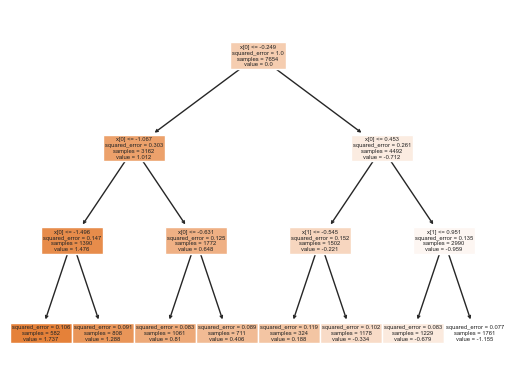

In [48]:
# Visualizing the tree
plt.figure()
plot_tree(dt,filled=True)
plt.show()

#### Random Forest

In [57]:
# Fitting random forest
rfr=RandomForestRegressor(n_estimators=10).fit(x_train,y_train)
y_rfr_pred=rfr.predict(x_test)

c:\Users\mmopa\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [58]:
# Model evaluation
print('Model Random Forest:')
print('R-squared:',r2_score(y_test,y_rfr_pred))
print('MSE:',mean_squared_error(y_test,y_rfr_pred))

Model Random Forest:
R-squared: 0.960153269886335
MSE: 0.03964571850413864
